In [15]:
#### Import all the important libraries
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [16]:
## import the data
df = pd.read_csv("./data.csv")
df.head()

,timestamp,indoor_temp,indoor_humidity,outdoor_temp,outdoor_humidity
0,2022-10-18T08:42:23,22.1,66.5,23.1,67.5
1,2022-10-18T08:54:11,22.4,63.2,23.4,64.2
2,2022-10-18T09:04:14,20.5,67.9,21.5,68.9
3,2022-10-18T09:14:14,20.1,68.4,21.1,69.4
4,2022-10-18T09:24:15,20.2,68.6,21.2,69.6


In [17]:
## check for null values there is no null values available
df.isnull().sum()

timestamp           0
indoor_temp         0
indoor_humidity     0
outdoor_temp        0
outdoor_humidity    0
dtype: int64

In [18]:
## split the data into dependent and independent features
X = df.iloc[:, 3:]
y = df.iloc[:,1:3]

In [19]:
## Split the data into Training and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Hyperparameter Tuning

In [6]:
## Hyperparameter tuning for model
param_grid = {
    "n_estimators": [300, 400, 500, 600, 700],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [6, 7, 8, 9, 10],
}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=-1)

In [7]:
grid_search.fit(X_train, y_train) 

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 400, 500, 600, 700]})

In [8]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 600}

### Creating Model or Model Training

In [20]:
## Creating and train the model
regressorModel = RandomForestRegressor(n_estimators=600, max_depth=10, max_features='sqrt')
regressorModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=600)

In [21]:
regressorModel.score(X_test, y_test)

0.8608113054631658

In [22]:
y_pred = regressorModel.predict(X_test)

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Test set evaluation metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

Test set evaluation metrics:
MAE: 2.3259601306468918
MSE: 22.005729527175
RMSE: 4.691026489711501
R2 score: 0.8608113054631658


In [24]:
print(y_test.shape, y_pred.shape)

(783, 2) (783, 2)


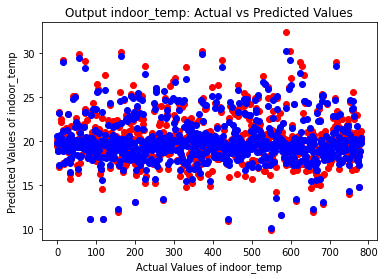

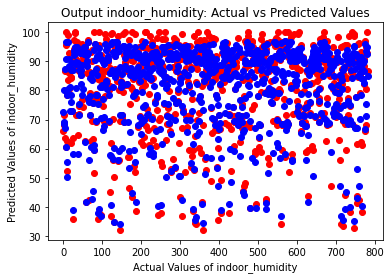

In [25]:
# Loop through the outputs

new_y_t = pd.DataFrame(y_test)
new_y_p = pd.DataFrame(y_pred)
for i in range(new_y_t.shape[1]):
  # Plot the actual versus predicted values for this output
  plt.scatter(range(len(new_y_t.iloc[:, i])), new_y_t.iloc[:, i], color='red')
  plt.scatter(range(len(new_y_p.iloc[:, i])), new_y_p.iloc[:, i], color='blue')
  plt.xlabel(f'Actual Values of {new_y_t.columns[i]}')
  plt.ylabel(f'Predicted Values of {new_y_t.columns[i]}')
  plt.title('Output {}: Actual vs Predicted Values'.format(new_y_t.columns[i]))
  plt.savefig(f"scatterPlot__{new_y_t.columns[i]}.png") 
  plt.show()



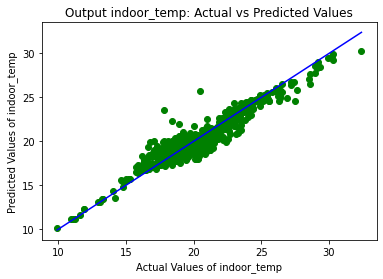

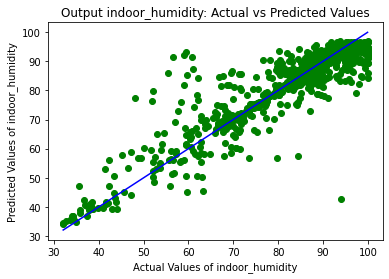

In [26]:
new_y_t = pd.DataFrame(y_test)
new_y_p = pd.DataFrame(y_pred)
for i in range(new_y_t.shape[1]):
  # Plot the actual versus predicted values for this output
  plt.scatter(new_y_t.iloc[:, i], new_y_p.iloc[:, i], color='green')
  p1 = max(max(new_y_p.iloc[:, i]), max(new_y_t.iloc[:, i]))
  p2 = min(min(new_y_p.iloc[:, i]), min(new_y_t.iloc[:, i]))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel(f'Actual Values of {new_y_t.columns[i]}')
  plt.ylabel(f'Predicted Values of {new_y_t.columns[i]}')
  plt.title('Output {}: Actual vs Predicted Values'.format(new_y_t.columns[i]))
  plt.savefig(f"plot__{new_y_t.columns[i]}.png") 
  plt.show()

## Cross Validation of the model

In [27]:
kFold_crossVali = KFold(10, shuffle=True)
model = RandomForestRegressor()
results = cross_val_score(model, X, y, cv=kFold_crossVali)
print(results)
print(np.mean(results))

[0.87893104 0.87076852 0.88141228 0.87594678 0.86941087 0.83759075
 0.87258963 0.86316601 0.85813721 0.85225364]
0.866020674166878


In [28]:
## save the model
joblib.dump(regressorModel, "model.pkl")

['model.pkl']